In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sns

In [2]:
curve_fit_df = pd.read_csv('alpha_values_MaxC_60000_Grad_0.000405_curve_fit.csv')
curve_fit_df.head(10)

,deme,alpha_outliers,alpha,Curve_Fit
0,1.0,5390.0,NaN,15491.724340
1,2.0,3120.0,NaN,13211.283310
2,3.0,6270.0,NaN,11283.390810
3,4.0,7150.0,NaN,9655.528751
4,5.0,5440.0,NaN,8282.154201
5,6.0,7010.0,7010.0,7123.926796
6,7.0,6210.0,6210.0,6147.003270
7,8.0,5430.0,5430.0,5322.394775
8,9.0,4660.0,4660.0,4625.382982
9,10.0,4120.0,4120.0,4034.991049


In [3]:
input_param_df = pd.read_excel('input_parameters.xlsx')
input_param_df.head()

,food_conc,drift_velocity,c_x_df_l_dc,attr_time_roc,Vo_max,Row Number
0,0.211633,0.068255,0.022403,6.192934e-07,12.521185,1
1,0.239944,0.077261,0.025359,7.935055e-07,12.521185,2
2,0.272042,0.087437,0.028699,1.016293e-06,12.521185,3
3,0.308433,0.098930,0.032471,1.301007e-06,12.521185,4
4,0.349693,0.111902,0.036729,1.664580e-06,12.521185,5


In [4]:
Grad = 0.000405 # µm^-1
# Receptor Probability is the component in the exponential function that's a byproduct of the alpha value and the receptor sensitivity.
# "attr_time_roc" is the time rate of change of receptor (attractant from food) protein bound, = input_param_df['drift_velocity'] * Grad * input_param_df['c_x_df_l_dc']
input_param_df['rate_tum_up'] = np.exp(-1.16 - curve_fit_df['Curve_Fit']*input_param_df['attr_time_roc'])
input_param_df['rate_tum_down'] = np.exp(-1.16 + curve_fit_df['Curve_Fit']*input_param_df['attr_time_roc'])
input_param_df.head()

,food_conc,drift_velocity,c_x_df_l_dc,attr_time_roc,Vo_max,Row Number,rate_tum_up,rate_tum_down
0,0.211633,0.068255,0.022403,6.192934e-07,12.521185,1,0.310493,0.316508
1,0.239944,0.077261,0.025359,7.935055e-07,12.521185,2,0.310217,0.316790
2,0.272042,0.087437,0.028699,1.016293e-06,12.521185,3,0.309912,0.317102
3,0.308433,0.098930,0.032471,1.301007e-06,12.521185,4,0.309573,0.317449
4,0.349693,0.111902,0.036729,1.664580e-06,12.521185,5,0.309194,0.317838


In [14]:
# Create a plot of the alpha values and polynomial fit.

x_values = curve_fit_df['deme']

# create traces
trace0 = go.Scatter(
    x = x_values,
    y = curve_fit_df['alpha'],
    mode = 'markers',
    name = 'alpha value points'
)
# The second trace
trace1 = go.Scatter(
    x = x_values,
    y = curve_fit_df.loc[:4, 'alpha_outliers'],
    mode = 'markers',
    name = 'alpha value outliers'
)
# The third trace
trace2 = go.Scatter(
    x = x_values,
    y = curve_fit_df['Curve_Fit'],
    mode = 'lines',
    name = 'polynomial fit'
)

# create the data
data = [trace0, trace1, trace2]  # assign traces to data

# create the layout
layout = go.Layout(
    title = 'Alpha values and polynomial curve fit.  Outliers are where receptor sensitivity is too low that the program cannot calculate exponentially increasing values.',
    yaxis = dict(title = 'Alpha')
)

# crate the fig
fig = go.Figure(data=data,layout=layout)
fig.show()

In [15]:
# Create a plot of the alpha values and polynomial fit.

x_values = curve_fit_df['deme']

# create traces
trace0 = go.Scatter(
    x = x_values,
    y = input_param_df['rate_tum_down'],
    mode = 'lines',
    name = 'Rate of tumbling going down gradient'
)
# The second trace
trace1 = go.Scatter(
    x = x_values,
    y = input_param_df['rate_tum_up'],
    mode = 'lines',
    name = 'Rate of tumbling going up gradient'
)
# create the data
data = [trace0, trace1]  # assign traces to data

# create the layout
layout = go.Layout(
    title = "Rate of Tumbling = exp(-1.16 +/- alpha*receptor)",
    yaxis = dict(title = 'Rate')
)

# crate the fig
fig = go.Figure(data=data,layout=layout)
fig.show()

In [5]:
deme_param = input_param_df

In [6]:
deme_param

,food_conc,drift_velocity,c_x_df_l_dc,attr_time_roc,Vo_max,Row Number,rate_tum_up,rate_tum_down
0,0.211633,0.068255,0.022403,6.192934e-07,12.521185,1,0.310493,0.316508
1,0.239944,0.077261,0.025359,7.935055e-07,12.521185,2,0.310217,0.316790
2,0.272042,0.087437,0.028699,1.016293e-06,12.521185,3,0.309912,0.317102
3,0.308433,0.098930,0.032471,1.301007e-06,12.521185,4,0.309573,0.317449
4,0.349693,0.111902,0.036729,1.664580e-06,12.521185,5,0.309194,0.317838
...,...,...,...,...,...,...,...,...
96,36311.865539,2.899142,0.951569,1.117287e-03,12.521185,97,0.234488,0.419098
97,41169.371192,3.142615,1.031483,1.312829e-03,12.521185,98,0.228943,0.429250
98,46676.674393,3.396942,1.114959,1.533917e-03,12.521185,99,0.222055,0.442565
99,52920.699764,3.659878,1.201261,1.780570e-03,12.521185,100,0.214012,0.459196


Algorithm for Bias Random Walk

Definition:
Vo is the run speed of the ecoli, which is assumed to be constant
t_up is the mean time for ecoli for moving up a food gradient
t_down is the mean time for ecoli for moving down a food gradient
 
The drift speed is: vd = vo . del_t = vo . (t_up - t_down1)
which is the dot product between the run speed and the difference in time moving up and down the gradient.

Now for the Allen algorithm, the average migration time is related to the basic diffusion coefficient: D = (L^2)/(2*del_t),

where L is the separation between demes, and del_t = (L^2)/(2*D).

To introduce an upstream drift velocity, we introduce a fractional bias, 0 < f < 1.

The drift velocity must equal: vd = [L*f - L*(1 - f)]/del_t

Solving we get a fractional bias of:
    f = (vd * del_t)/2L + 1/2


In [7]:
# Calculating the probability of one particle travelling between demes using the tumble probability

# Factors:

# Deme Length
# Deme Surface Area
D = 112 # Diffusion in microns^2/s
deme_length = 310 # microns
d2 = np.square(deme_length)

# The size of the channel between the two demes.
l = 0.1*d2

# Population with Carrying Capacity
ph = np.random.default_rng()
p = ph.random() # population with carrying capacity factor represented by random percentage.

# Tumble Probability within timeframe dt = 0.1s.

# The relative probability of tumbling going up the gradient will help determine direction of tumbling.
# relative_prob_tum_up < relative_prob_tum_down
rel_prob_tum_up = ( deme_param['rate_tum_up'] )/( deme_param['rate_tum_down'] + deme_param['rate_tum_up'] )
rel_prob_tum_down = ( deme_param['rate_tum_down'] )/( deme_param['rate_tum_down'] + deme_param['rate_tum_up'] )
tum_diff = np.abs(deme_param['rate_tum_down'] - deme_param['rate_tum_up'])
rel_tum_diff = ( np.abs(deme_param['rate_tum_down'] - deme_param['rate_tum_up']) )/( deme_param['rate_tum_down'] + deme_param['rate_tum_up'] )
del_p = deme_param['rate_tum_down'] - deme_param['rate_tum_up'] # difference in tumbling series

# Make a table to compare theoretical drift velocity the the percent differences between tumbling going up and down gradient.
mig_rate_df = pd.DataFrame()
mig_rate_df[["deme", "food_conc", "drift_velocity"]] = deme_param[["Row Number", "food_conc", "drift_velocity"]]
mig_rate_df["rel_prob_tum_up"] = rel_prob_tum_up
mig_rate_df["rel_prob_tum_down"] = rel_prob_tum_down
mig_rate_df["tum_diff"] = tum_diff
mig_rate_df["rel_prob_tum_diff"] = rel_tum_diff
# Find the positions of the fastest and slowest drift velocities.
print(f"\n{mig_rate_df.loc[mig_rate_df.rel_prob_tum_diff.idxmax(), :]}")
print(f"\n{mig_rate_df.loc[mig_rate_df.rel_prob_tum_diff.idxmin(), :]}")
mig_rate_df


deme                 48.000000
food_conc            77.319782
drift_velocity        4.135121
rel_prob_tum_up       0.239435
rel_prob_tum_down     0.760565
tum_diff              0.382826
rel_prob_tum_diff     0.521129
Name: 47, dtype: float64

deme                 1.000000
food_conc            0.211633
drift_velocity       0.068255
rel_prob_tum_up      0.495203
rel_prob_tum_down    0.504797
tum_diff             0.006015
rel_prob_tum_diff    0.009594
Name: 0, dtype: float64


,deme,food_conc,drift_velocity,rel_prob_tum_up,rel_prob_tum_down,tum_diff,rel_prob_tum_diff
0,1,0.211633,0.068255,0.495203,0.504797,0.006015,0.009594
1,2,0.239944,0.077261,0.494759,0.505241,0.006573,0.010483
2,3,0.272042,0.087437,0.494267,0.505733,0.007190,0.011467
3,4,0.308433,0.098930,0.493719,0.506281,0.007876,0.012561
4,5,0.349693,0.111902,0.493107,0.506893,0.008644,0.013785
...,...,...,...,...,...,...,...
96,97,36311.865539,2.899142,0.358772,0.641228,0.184609,0.282456
97,98,41169.371192,3.142615,0.347835,0.652165,0.200307,0.304329
98,99,46676.674393,3.396942,0.334108,0.665892,0.220511,0.331785
99,100,52920.699764,3.659878,0.317899,0.682101,0.245184,0.364203


In [9]:
maxVindex = mig_rate_df.drift_velocity.idxmax()
maxV = mig_rate_df.loc[maxVindex, "drift_velocity"]
print(f"\n{mig_rate_df.loc[mig_rate_df.drift_velocity.idxmax(), :]}")
maxV


deme                 50.000000
food_conc            99.389835
drift_velocity        4.159555
rel_prob_tum_up       0.242448
rel_prob_tum_down     0.757552
tum_diff              0.376788
rel_prob_tum_diff     0.515104
Name: 49, dtype: float64


4.15955452031555

dN/dt = D(d^2N/dx^2) + Vd(dN/dx)

In [14]:
print(D/d2)
D/d2 + maxV/deme_length
print((D/d2)/(D/d2 + maxV/deme_length))

0.0011654526534859522
0.0799165499228218


- Save tumble rate per position for bacterial boundary.
- Incorporate bacterial cluster migration calculation from paper to ammend tumble rate. (This will also remove population factor).
- Use boundary tumble rates to calculate rate for use in Gillespie.
- Use rate calculate above for inter deme migration.

In [ ]:
# Tumble rate per position for bacterial boundary
    # If this is a population boundary region mark it on the matrix as 1.
        # Bac_Bou_Mtx(i,1) = BacBound
    # This is the time elapsed for that boundary.
        # Bac_Bou_Mtx(i,2) = tum_dt
    # The rate of tumbling up and down
        # Pr_t_up(i) = exp(-lnr - alpha(i)*Rtroc(i))
        # Pr_t_down(i) = exp(-lnr + alpha(i)*Rtroc(i))
    # r_bound = BacBound*Pr_t(i), (if BacBound = 1, and for Pr_t_up(i) or Pr_t_down(i))
        # If r_bound selected:
            # Prob_select = softmax(Pr_t(i))
    # While the tumble bias due to the attractant gradient is maintained, the bacteria will run at a reduced speed.
    # Total Rate = N_bac*Pr_t(i), (because the tumble rate will remain the same, (just change the run speed for species of bacteria))

# Migration Rate between demes
    # Right: D/(dx^2) + (vd/dx)
    # Left: D/(dx^2)
    # Find migration rate per deme:
        # i = 1, find N_bac_right*[D/(dx^2) + (vd_bac/dx)], (vd_bac is run speed for that particular bacteria affected by antibiotics)
        # i = N, find N_bac_left*[D/dx^2]
        # 1 < i < N, find N_bac_right*[D/(dx^2) + (vd_bac/dx)] + N_bac_left*[D/dx^2]
        # N_bac_right = 

In [ ]:
# Possible Swarm Solution:
# Population of Bacteria according to Allen: 1 -> 9*10^9 cells/mL = (1 -> 9*10^9 cells)/(10^12 µm^3) = 0.001 -> 0.009 cells/µm^3
# The model uses around 6000 cells/deme,
# For 0.001 cells/µm^3, density = 0.001*310 = 0.31 cells/µm^2 = 31 cells/100 µm^2


# Density is proportional to population facter: den = (1 + 31*N/CC)
# Now tumble rate can be proportional to the density:
# Based on the figure, make an arctan increase proportional to population density, V = (5.5/2)*(1 + tanh(den/mxD - 2.5)), den is the density, 
    # mxD is the 100*surface area per cell whereby the function equals 5.45*V at den = 31 cells/100 µm^2, mxD = 6.4 (100 µm^2/cells)

Tumble Rate Difference Proportional to Drift Index

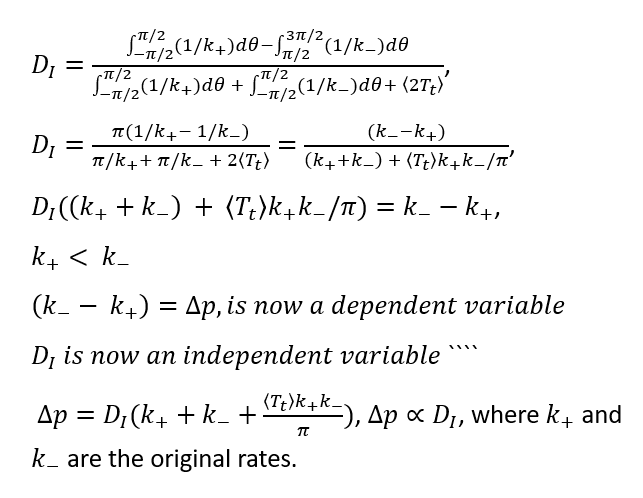

In [10]:
from math import cos
# Integrate the tumble rates to figure out run-to-tumble times.
def integrand(x, a):
    return a*cos(x)

for i in deme_param.index.values:
#     print(deme_param.loc[i, "rate_tum_up"])
#     print(deme_param.loc[i, "rate_tum_down"])
    a = deme_param.loc[i, "rate_tum_up"]
    I = sp.integrate.quad(integrand, -(np.pi)/2, (np.pi)/2, args=a)
    print(I[0])
    a = deme_param.loc[i, "rate_tum_down"]
    I = sp.integrate.quad(integrand, (np.pi)/2, (3*(np.pi))/2, args=a)
    print(I[0])
    break

# deme_param["integrate_tum_up"] = deme_param.apply(lambda x: x["rate_tum_up"], axis="columns")
# deme_param

0.6209859993779216
-0.6330164332388039


In [12]:
mig_rate_df.to_csv("mig_rate_df.csv")